<a href="https://colab.research.google.com/github/kaj082/unsupervised_ML/blob/main/unsupervised_ML_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPARK** **FOUNDATION**-**GRIPSEPTEMBER21**


**Data** **Science** **and** **Business** **Analytics** **Intern**


AUTHOR NAME: Kajal Dafada


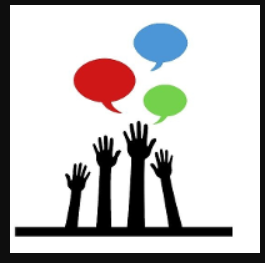


**TASK**:-**2** **Predict using Unsupervised ML**


 Predict the optimum number of clusters and repsent it visually.



 Importing Relavent Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets


In [21]:
#read iris data set
df = pd.read_csv("Iris.csv")
iris = datasets.load_iris();
iris_df = pd.DataFrame(iris.data,columns= iris.feature_names)
print("Data import successfully")

Data import successfully


In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
print(df.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [19]:
print(df.Species.nunique())
print(df.Species.value_counts())

3
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


**Data visualization**

In [24]:
import plotly.express as px
fig = px.scatter(df,x = 'SepalLengthCm', y= 'PetalWidthCm')
fig.show()

In [31]:
fig = px.scatter(df,x = 'PetalWidthCm', y= 'SepalLengthCm')
fig.show() 

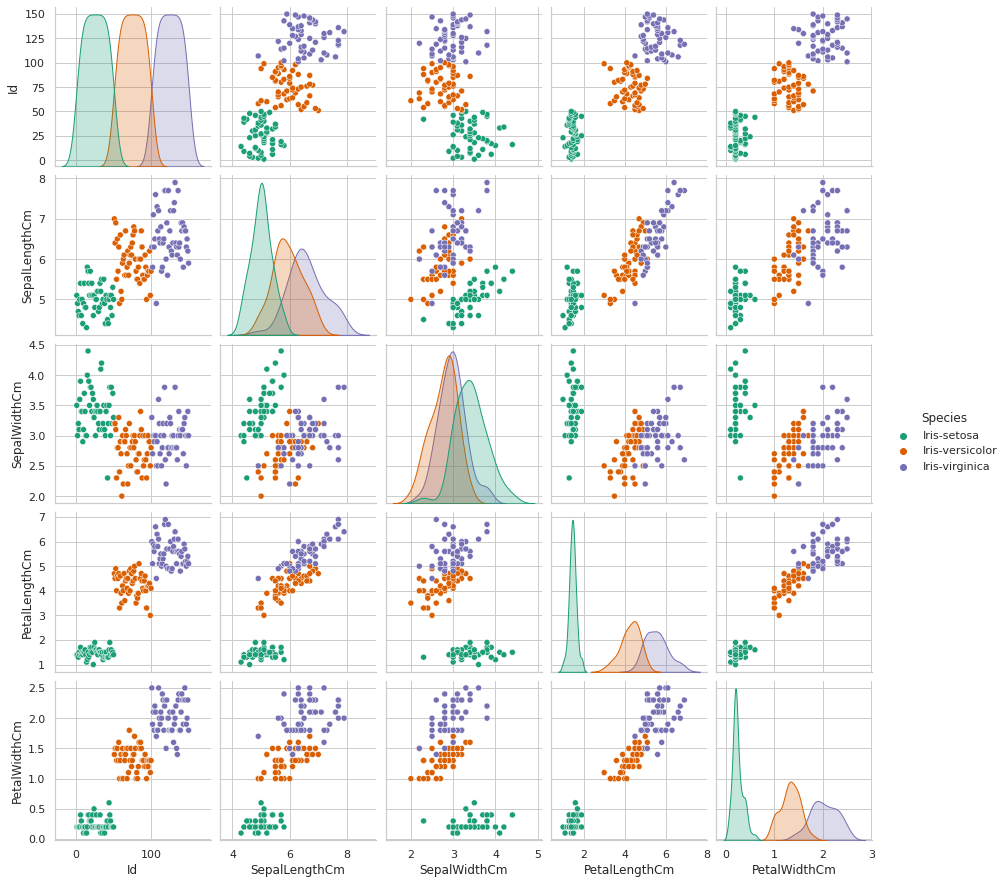

In [32]:
#above visualizations are some what difficult to understand and comapre
sns.pairplot(df,hue='Species',palette='Dark2')

In [43]:
#from all these the easiest visualization can be none other than a 3D plot which gives perfect view of clusters
fig = px.scatter_3d(df,x = 'SepalLengthCm', y= 'SepalWidthCm', z= 'PetalWidthCm', color= 'Species')
fig.show()  

In [44]:
#finding the optimum number of cluters for k-means
from sklearn.cluster import KMeans
X = iris_df.iloc[:,[0,1,2,3]].values

In [47]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [48]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

In [56]:
#Elbow method to find optimum value of k
import plotly.graph_objects as go
import numpy as np
x = np.arange(10)
y = wcss
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(title='The Elbow Method', xaxis_title="Number of cluster", yaxis_title='Within-Cluster Sum of Squares')
fig.show()

In [57]:
#k=3,because after 3 line is almost constant
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

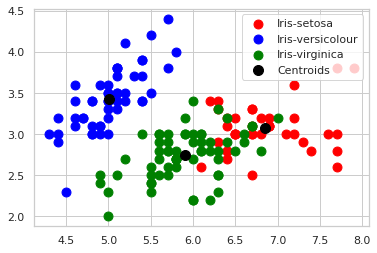

In [58]:
#plotting clusters and centerioids
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c ='red', label = 'Iris-setosa')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c ='blue', label = 'Iris-versicolour')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c ='green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c ='black', label = 'Centroids') 
plt.legend()

In [59]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])